# Introduction
---
this documents are meant for practice and exploring data.</br>
data source: https://www.kaggle.com/datasets/gregorut/videogamesales

In this scenario, there is no specific business question guiding our analysis, and we have the freedom to explore the data and draw conclusions based on our own insights and understanding.

# Data and Library Importing
---

In [1]:
# importing libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
data_url = 'https://raw.githubusercontent.com/zuuwee-1/data-urls/main/kaggle.comdatasetsgregorutvideogamesales/vgsales.csv'
df = pd.read_csv(data_url)

In [3]:
# display df
display(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Cleaning
---
During the data cleaning phase, I followed these steps:

1. Identifying and addressing missing values
2. Correcting data types of columns as neeed
3. Removing duplicate entries
4. Validating data integrity

In [4]:
df.info()

print()
print("===================")
print("number of isnull():")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

number of isnull():
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


    note:
    because there is multiple null in 'Year' column, i first wanted to see the heatmap of the missing values.
    this can help to determine wether it's catagorized as random missing, or not.

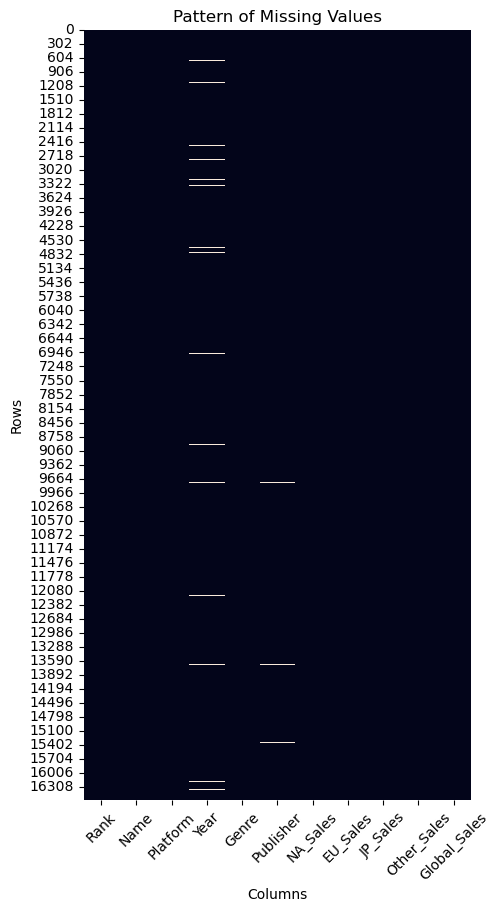

In [5]:
# Create a heatmap of missing values
plt.figure(figsize=(5,10))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Pattern of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.ylabel('Rows')
plt.show()

    note:
    based on the pattern visualization, i decide that it is indeed random missing values, and therefore are safe to remove.

In [6]:
# using dropna to drop data that have missing value
df_dropna = df.dropna(how = 'any') # all = semua nya ada yg kosong -> hapus. any = salah satu kosong -> hapus

In [7]:
print("number of isnull():")
print(df_dropna.isnull().sum())

number of isnull():
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [8]:
# # Convert float to integer before converting to datetime
# df_dropna['Year'] = df_dropna['Year'].astype(int)

# # Convert 'Year' column to datetime with only year information
# df_dropna['Year'] = pd.to_datetime(df_dropna['Year'], format='%Y')

# Convert float to integer before converting to datetime
df_dropna.loc[:, 'Year'] = df_dropna['Year'].astype(int)

# Convert 'Year' column to datetime with only year information
df_dropna.loc[:, 'Year'] = pd.to_datetime(df_dropna['Year'], format='%Y')

In [9]:
display(df_dropna)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Name          16291 non-null  object        
 2   Platform      16291 non-null  object        
 3   Year          16291 non-null  datetime64[ns]
 4   Genre         16291 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16291 non-null  float64       
 7   EU_Sales      16291 non-null  float64       
 8   JP_Sales      16291 non-null  float64       
 9   Other_Sales   16291 non-null  float64       
 10  Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
# checking for duplicate data
df_dupe_data = df_dropna.duplicated(keep='last')
df_dupe_data.value_counts()

False    16291
Name: count, dtype: int64

In [12]:
# naming it df_clean as ready-to-use dataframe
df_clean = df_dropna

# Data Exploration
---

## Sales Trends Based on Publish Year
In the initial phase of data exploration, I sought to examine the performance of sales across different publication years, both globally and within each region.</br>
This analysis aims to identify years that stand out in terms of sales performance, providing insights into the overall trends and highlighting exceptional years in terms of sales.

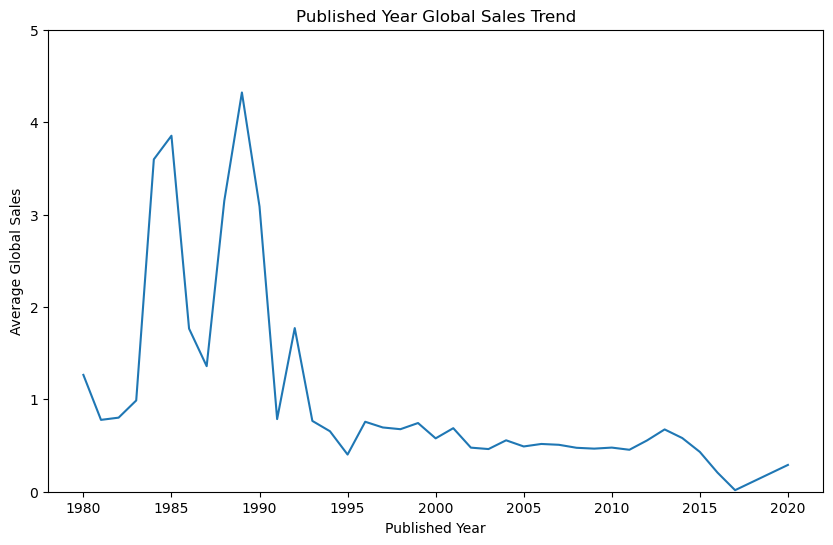

In [13]:
# Group the data by year and calculate the mean of 'Global Sales' for each published year
published_year_sales = df_clean.groupby(df_clean['Year'].dt.year)['Global_Sales'].mean().reset_index()

# Create a bar chart of the average 'Global Sales' for each published year
plt.figure(figsize=(10, 6))
plt.plot(published_year_sales['Year'], published_year_sales['Global_Sales'])

plt.xlabel('Published Year')
plt.ylabel('Average Global Sales')
plt.title('Published Year Global Sales Trend')

plt.ylim(0, 5)
plt.show()

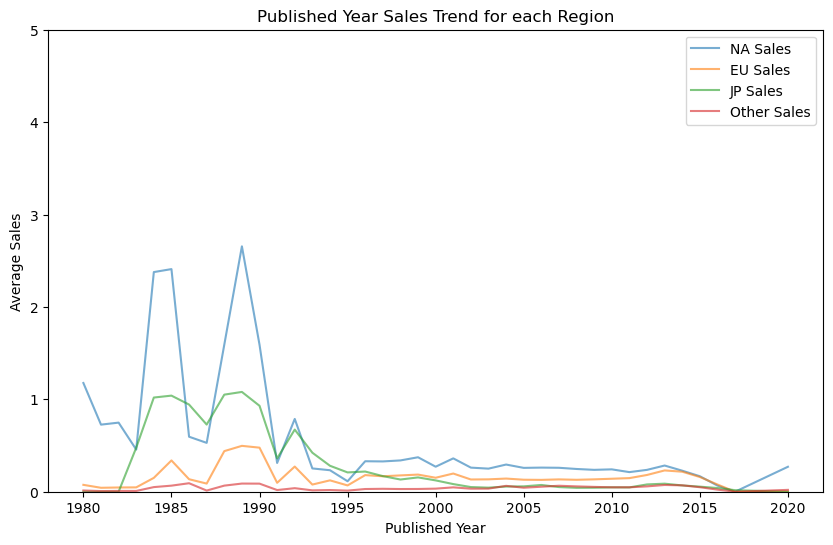

In [14]:
# Group the data by year and calculate the mean of sales for each published year
published_year_sales = df_clean.groupby(df_clean['Year'].dt.year).agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean',
    'Other_Sales': 'mean'
}).reset_index()

# Create separate plots for each region's sales trend
plt.figure(figsize=(10, 6))

plt.plot(published_year_sales['Year'], published_year_sales['NA_Sales'], label='NA Sales', alpha=0.6)
plt.plot(published_year_sales['Year'], published_year_sales['EU_Sales'], label='EU Sales', alpha=0.6)
plt.plot(published_year_sales['Year'], published_year_sales['JP_Sales'], label='JP Sales', alpha=0.6)
plt.plot(published_year_sales['Year'], published_year_sales['Other_Sales'], label='Other Sales', alpha=0.6)

plt.xlabel('Published Year')
plt.ylabel('Average Sales')
plt.title('Published Year Sales Trend for each Region')

plt.legend()
plt.ylim(0, 5)
plt.show()

### Conclusion
When analyzing the trends for each region, we observe consistent peaks and slopes across specific years, similar the patterns observed in Global Sales. </br>Notably, these trends are particularly noticable in the following years:
- 1985
- 1990
- and between 1990 and 1995

### Exploring Trends Further
As depicted in the visualization plot, the sales trends exhibit notable peaks between the years 1985 and 1995.</br>
This observation prompts the question: Are classic (or retro) games more favored among player that reflect in salesd?

(todo)

## Publisher-Spesific Analysis

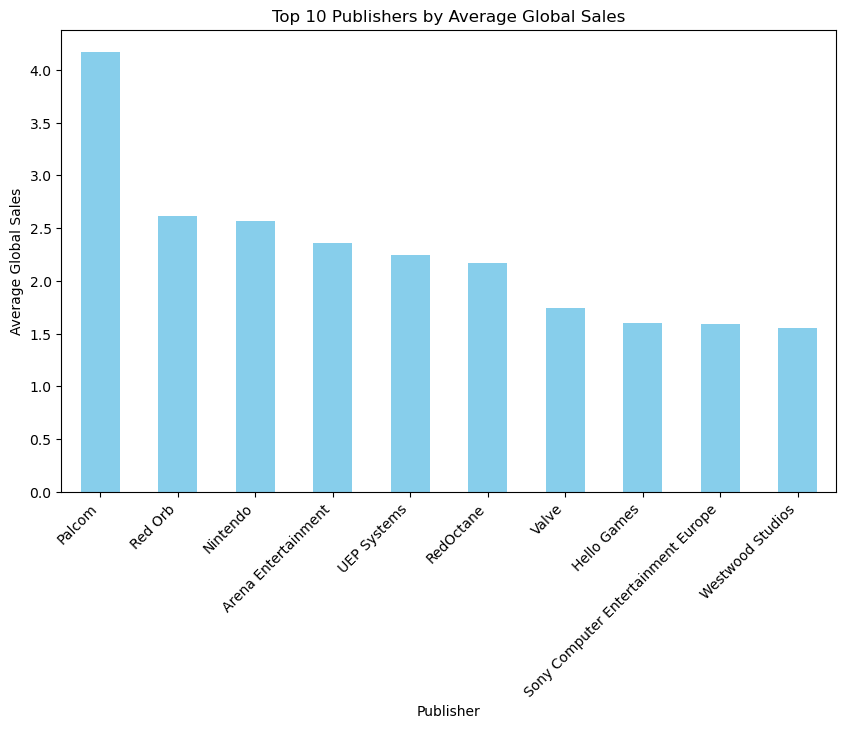

In [18]:
# Group the data by publisher and calculate the mean of global sales for each publisher
publisher_sales = df_clean.groupby('Publisher')['Global_Sales'].mean().nlargest(10)

# Create a bar chart of the top 10 publishers based on average global sales
plt.figure(figsize=(10, 6))
publisher_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Average Global Sales')
plt.title('Top 10 Publishers by Average Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

## Genre-Spesific Analysis

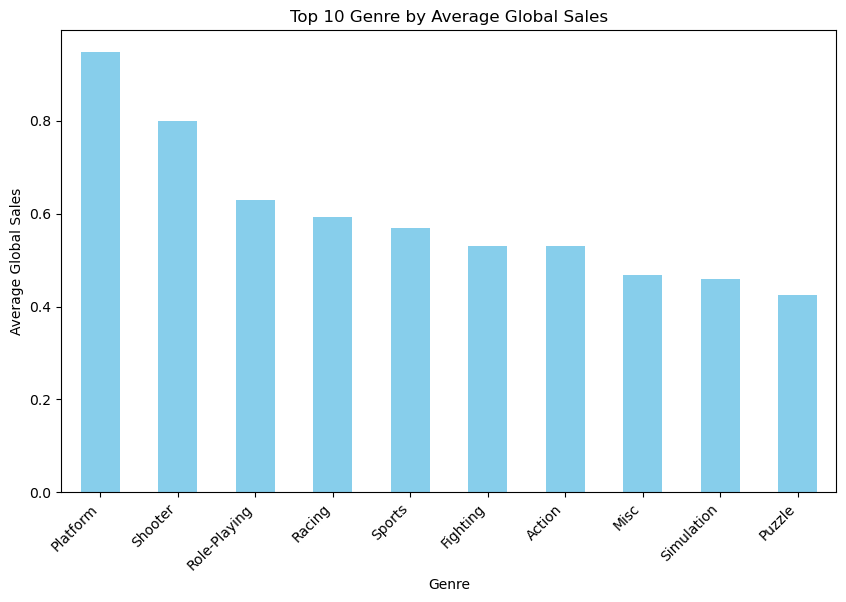

In [20]:
# Group the data by publisher and calculate the mean of global sales for each publisher
Genre_sales = df_clean.groupby('Genre')['Global_Sales'].mean().nlargest(10)

# Create a bar chart of the top 10 publishers based on average global sales
plt.figure(figsize=(10, 6))
publisher_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales')
plt.title('Top 10 Genre by Average Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()